Introducción al Dataset de Transacciones Financieras
Este dataset sintético representa transacciones financieras en un sistema bancario digital. Fue diseñado para reflejar escenarios reales de fraude financiero y permite analizar patrones en diferentes tipos de operaciones.

El dataset contiene 1,048,575 transacciones y proporciona información detallada sobre movimientos de dinero entre cuentas, incluyendo el saldo antes y después de cada operación.

📝 ¿Qué tipos de transacciones están registradas?
Las transacciones en el dataset pueden clasificarse en los siguientes tipos:

PAYMENT – Pagos realizados por clientes a otras entidades (probablemente facturas o servicios).
TRANSFER – Transferencias de dinero entre cuentas bancarias.
CASH_OUT – Retiro de dinero en efectivo por parte de un usuario.
DEBIT – Débito directo automático en la cuenta de un cliente.
CASH_IN – Depósitos de dinero en una cuenta.
📌 Objetivo del análisis
Este dataset es ideal para estudiar fraudes financieros y detectar posibles transacciones sospechosas.
Las transacciones fraudulentas están etiquetadas con isFraud = 1, lo que nos permite identificar:
✅ Patrones en cuentas de origen y destino
✅ Montos de transacción asociados a fraudes
✅ Cuentas "mulas" que reciben dinero y lo transfieren rápidamente
✅ Uso de machine learning para predecir fraudes en nuevas transacciones

Con este análisis, buscamos comprender cómo ocurren los fraudes y cómo pueden detectarse automáticamente en un entorno financiero digital. 🚀

In [2]:
import pandas as pd

# Cargar el dataset
file_path = r"C:\Users\Rodrigo Lugo\Downloads\Synthetic Financial datasets.csv"
df = pd.read_csv(file_path)

# Ver las primeras filas
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


1. Análisis Exploratorio de Datos (EDA)
Primero, revisemos información general sobre el dataset y veamos cuántos datos tenemos.

1.1 Revisar información del dataset
Ejecuta este código en Jupyter:

In [3]:
import pandas as pd

# Cargar el dataset
file_path = r"C:\Users\Rodrigo Lugo\Downloads\Synthetic Financial datasets.csv"
df = pd.read_csv(file_path)

# Mostrar información general del DataFrame
df.info()

# Mostrar estadísticas descriptivas de las columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


Análisis inicial de los datos


No hay valores nulos, lo que facilita el análisis.
El dataset es grande (~1 millón de filas).
La columna isFraud muestra que solo el 0.1% de las transacciones son fraudulentas (esto indica un dataset desbalanceado).
La columna isFlaggedFraud tiene solo ceros, lo que sugiere que el sistema no detectó fraudes automáticamente.
Los montos de transacción varían enormemente desde 0.1 hasta 10,000,000.
Algunas cuentas tienen saldo cero, lo que puede ser relevante para identificar patrones de fraude.

Siguientes análisis
Ahora, hagamos un análisis más detallado:

1️⃣ Ver distribución de fraudes en los diferentes tipos de transacción

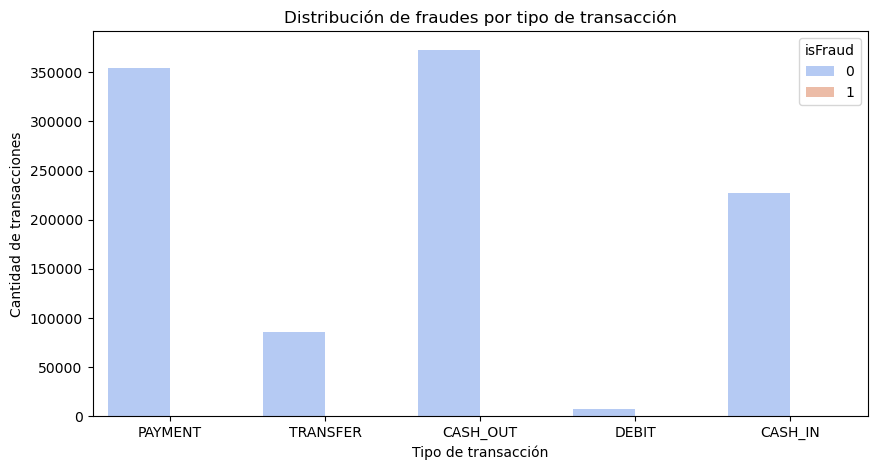

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de tipos de transacción
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="type", hue="isFraud", palette="coolwarm")
plt.title("Distribución de fraudes por tipo de transacción")
plt.xlabel("Tipo de transacción")
plt.ylabel("Cantidad de transacciones")
plt.show()


2️⃣ Ver distribución de montos en fraudes vs. no fraudes

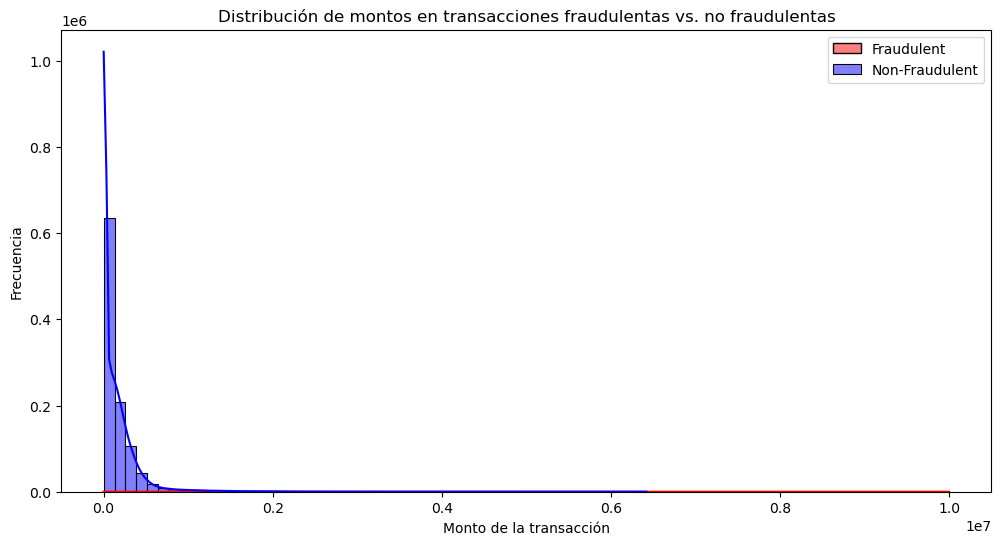

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["isFraud"] == 1]["amount"], bins=50, color="red", label="Fraudulent", kde=True)
sns.histplot(df[df["isFraud"] == 0]["amount"], bins=50, color="blue", label="Non-Fraudulent", kde=True)
plt.legend()
plt.title("Distribución de montos en transacciones fraudulentas vs. no fraudulentas")
plt.xlabel("Monto de la transacción")
plt.ylabel("Frecuencia")
plt.show()


3️⃣ Identificar patrones de saldo antes y después de la transacción

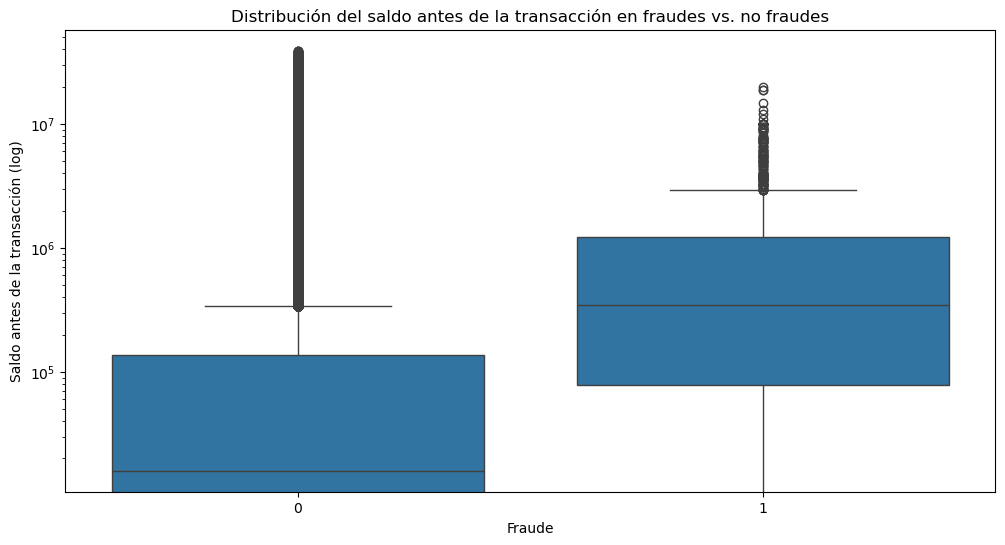

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="isFraud", y="oldbalanceOrg", data=df)
plt.yscale("log")  # Usamos escala logarítmica porque los valores varían mucho
plt.title("Distribución del saldo antes de la transacción en fraudes vs. no fraudes")
plt.xlabel("Fraude")
plt.ylabel("Saldo antes de la transacción (log)")
plt.show()


📌 Análisis de Resultados
A partir de los gráficos obtenidos, podemos destacar los siguientes hallazgos:

1️⃣ Distribución de fraudes por tipo de transacción
CASH_OUT y TRANSFER concentran todos los fraudes.
PAYMENT, DEBIT y CASH_IN no tienen fraudes detectados.
Esto sugiere que los fraudes ocurren principalmente en transacciones que involucran retiro de dinero, lo que podría indicar técnicas de lavado de dinero o transferencias sospechosas entre cuentas.

2️⃣ Distribución de montos en fraudes vs. no fraudes
La mayoría de las transacciones tienen montos pequeños.
Las transacciones fraudulentas parecen estar en un rango más alto, aunque su cantidad es baja en comparación con las no fraudulentas.
Los fraudes en transacciones pequeñas son poco frecuentes.

3️⃣ Distribución del saldo antes de la transacción en fraudes vs. no fraudes
Los usuarios que cometen fraude suelen tener un saldo inicial más alto en comparación con transacciones normales.
Hay outliers en ambas categorías, pero se observa que las cuentas fraudulentas manejan montos significativamente más altos.



1. Analizar destinatarios de transacciones fraudulentas


In [7]:
# Filtrar transacciones fraudulentas
df_fraud = df[df["isFraud"] == 1]

# Contar cuántas veces aparece cada destinatario en fraudes
fraud_dest_counts = df_fraud["nameDest"].value_counts().head(10)

# Mostrar los 10 destinatarios más comunes en fraudes
print(fraud_dest_counts)


nameDest
C803116137     2
C1013511446    2
C52390890      2
C410033330     2
C200064275     2
C104038589     2
C185805228     2
C935310781     2
C1827219533    2
C1981613973    2
Name: count, dtype: int64


2. Relación entre oldbalanceOrg, oldbalanceDest y fraude

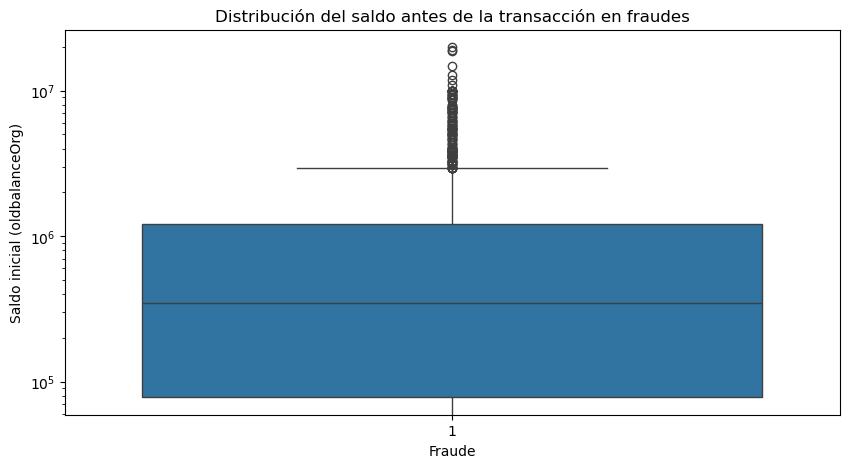

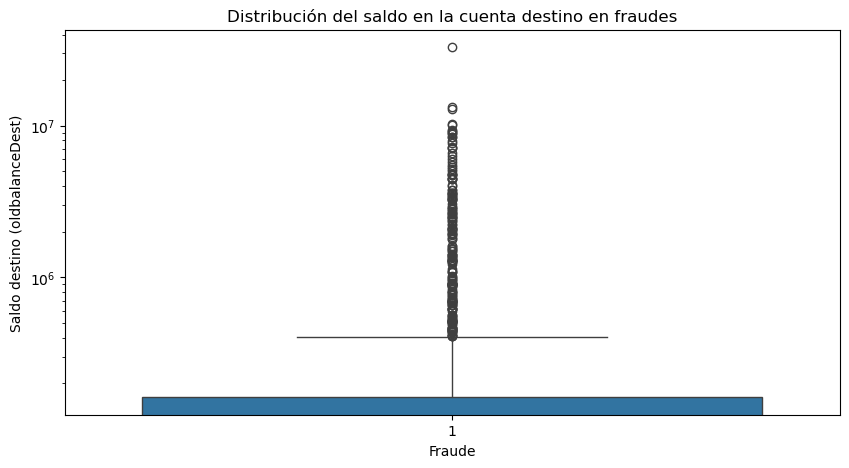

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_fraud, x="isFraud", y="oldbalanceOrg")
plt.yscale("log")  # Escala logarítmica para ver mejor la distribución
plt.title("Distribución del saldo antes de la transacción en fraudes")
plt.xlabel("Fraude")
plt.ylabel("Saldo inicial (oldbalanceOrg)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_fraud, x="isFraud", y="oldbalanceDest")
plt.yscale("log")
plt.title("Distribución del saldo en la cuenta destino en fraudes")
plt.xlabel("Fraude")
plt.ylabel("Saldo destino (oldbalanceDest)")
plt.show()


3. Evaluar si los fraudes ocurren con montos altos y en patrones específicos


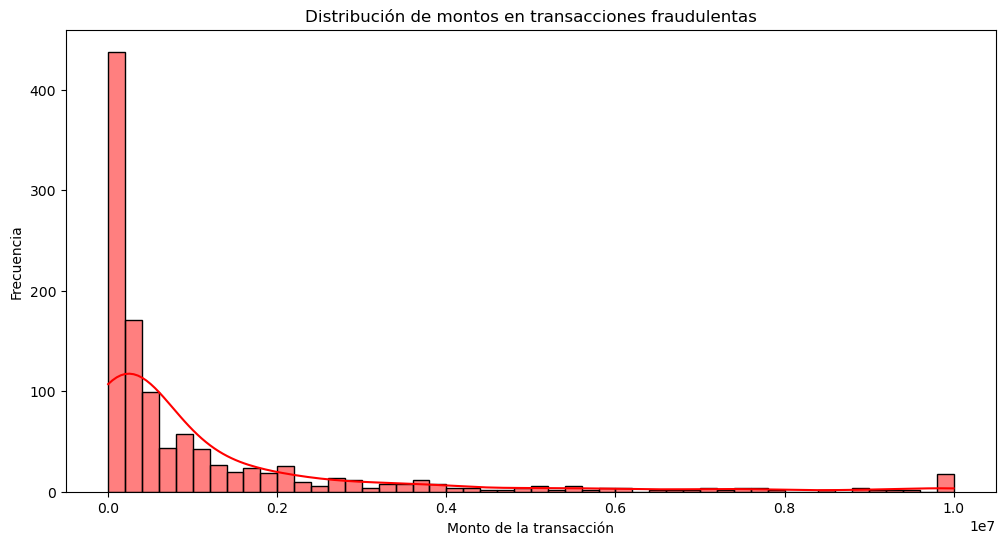

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df_fraud["amount"], bins=50, color="red", kde=True)
plt.title("Distribución de montos en transacciones fraudulentas")
plt.xlabel("Monto de la transacción")
plt.ylabel("Frecuencia")
plt.show()


1️⃣ Identificación de destinatarios de transacciones fraudulentas


📌 Resultados:

Los 10 destinatarios más comunes en transacciones fraudulentas han recibido solo 2 fraudes cada uno.
No hay un solo destinatario que concentre demasiados fraudes, lo que indica que los fraudes pueden estar distribuidos en múltiples cuentas.
Posible explicación:
Los fraudes no se están acumulando en una sola cuenta, sino en varias diferentes para evitar detección.
Puede haber cuentas ficticias creadas para recibir estos fondos.

2️⃣ Relación entre oldbalanceOrg, oldbalanceDest y fraude
📌 Resultados:

Los fraudes ocurren en cuentas con alto saldo inicial (oldbalanceOrg).
Las cuentas destino (oldbalanceDest) tienen saldo inicial bajo o cero en la mayoría de los casos.
Esto sugiere que los fraudes pueden involucrar transferencias a cuentas vacías, posiblemente creadas solo para desviar dinero y luego desaparecer.

3️⃣ Evaluar si los fraudes ocurren con montos altos y en patrones específicos
📌 Resultados:

La mayoría de los fraudes se dan en montos relativamente bajos, aunque hay fraudes en montos altos.
Distribución sesgada hacia valores pequeños, pero hay excepciones con montos de hasta 10,000,000.
Los fraudes en montos altos podrían ser menos frecuentes pero más dañinos.

In [1]:
import sys
print("Jupyter está funcionando con Python versión:", sys.version)


Jupyter está funcionando con Python versión: 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


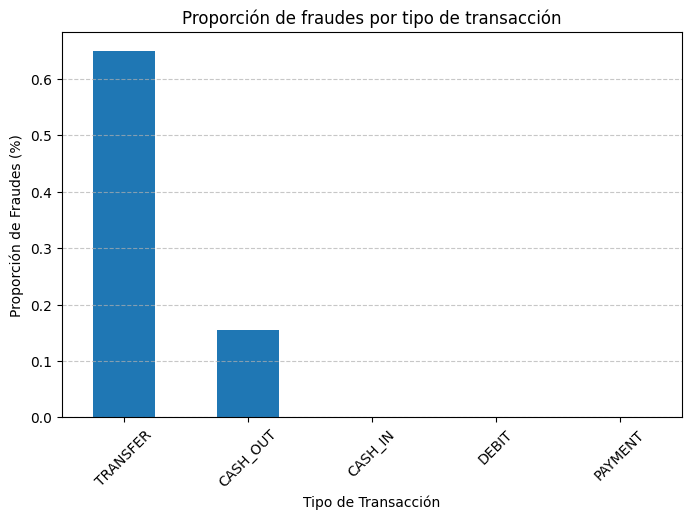

In [4]:
import matplotlib.pyplot as plt

# Contar la cantidad de fraudes por tipo de transacción
fraud_by_type = df[df["isFraud"] == 1]["type"].value_counts()
total_by_type = df["type"].value_counts()

# Calcular la proporción de fraudes por tipo de transacción
fraud_ratio = (fraud_by_type / total_by_type).fillna(0) * 100

# Graficar la proporción de fraudes por tipo de transacción
plt.figure(figsize=(8, 5))
fraud_ratio.sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Tipo de Transacción")
plt.ylabel("Proporción de Fraudes (%)")
plt.title("Proporción de fraudes por tipo de transacción")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()



In [9]:
!pip install seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


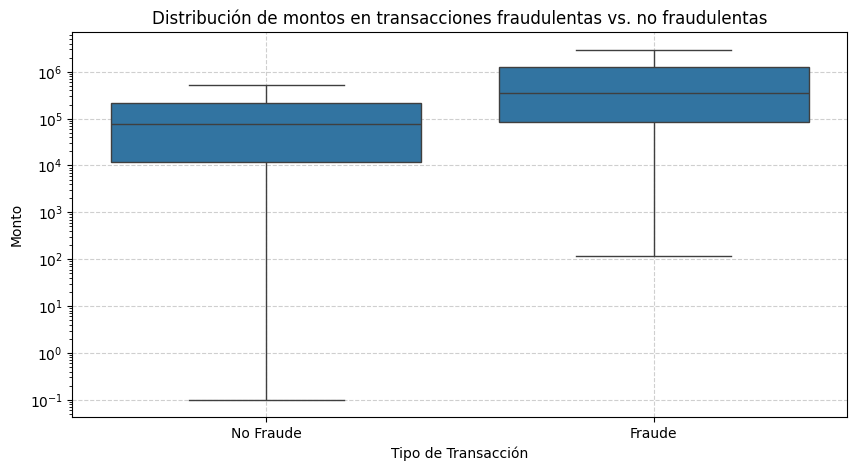

Top 10 cuentas más involucradas en fraude:
        Cuenta  Cantidad de Fraudes
0   C200064275                    2
1  C1827219533                    2
2    C52390890                    2
3  C1981613973                    2
4   C104038589                    2
5   C803116137                    2
6   C935310781                    2
7  C1013511446                    2
8   C185805228                    2
9   C410033330                    2


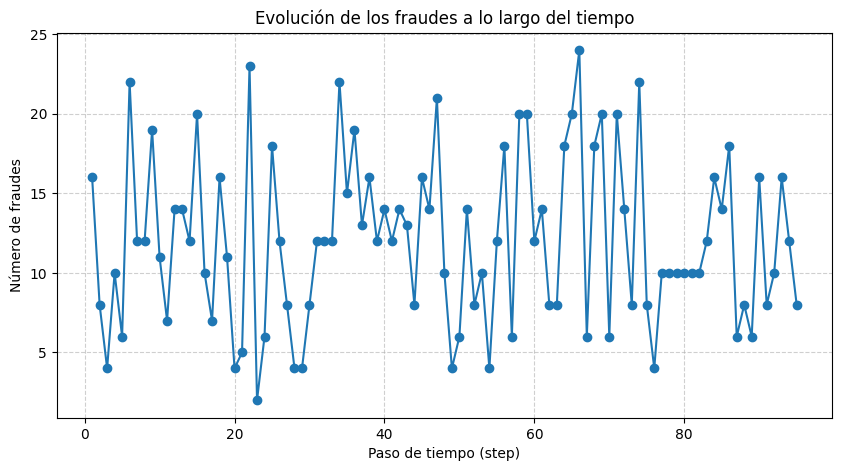

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de montos en transacciones fraudulentas vs. no fraudulentas
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["isFraud"], y=df["amount"], showfliers=False)
plt.xticks([0, 1], ["No Fraude", "Fraude"])
plt.xlabel("Tipo de Transacción")
plt.ylabel("Monto")
plt.title("Distribución de montos en transacciones fraudulentas vs. no fraudulentas")
plt.yscale("log")  # Escala logarítmica para visualizar mejor
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 2. Cuentas más involucradas en fraudes
df_fraud = df[df["isFraud"] == 1]
fraud_accounts = pd.concat([df_fraud["nameOrig"], df_fraud["nameDest"]])
top_fraud_accounts = fraud_accounts.value_counts().head(10)

# 3. Patrón temporal del fraude
fraud_timeline = df[df["isFraud"] == 1]["step"].value_counts().sort_index()

# Mostrar las 10 cuentas más involucradas en fraudes
top_fraud_accounts_df = top_fraud_accounts.reset_index()
top_fraud_accounts_df.columns = ["Cuenta", "Cantidad de Fraudes"]
print("Top 10 cuentas más involucradas en fraude:")
print(top_fraud_accounts_df)

# Gráfico de evolución de fraudes en el tiempo
plt.figure(figsize=(10, 5))
plt.plot(fraud_timeline.index, fraud_timeline.values, marker="o", linestyle="-")
plt.xlabel("Paso de tiempo (step)")
plt.ylabel("Número de fraudes")
plt.title("Evolución de los fraudes a lo largo del tiempo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



Preprocesamiento de Datos

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selección de características relevantes
features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "step"]
X = df[features]
y = df["isFraud"]

# División en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarización de datos (opcional, mejora el desempeño en algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Regresión Logística (Baseline)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelo de regresión logística
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística - Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Regresión Logística - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.89      0.25      0.40       228

    accuracy                           1.00    209715
   macro avg       0.95      0.63      0.70    209715
weighted avg       1.00      1.00      1.00    209715

Matriz de Confusión:
 [[209480      7]
 [   170     58]]
ROC AUC Score: 0.8782363206559983


In [8]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE solo en los datos de entrenamiento
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Duplica la cantidad de fraudes
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificación de distribución de clases
print("Distribución después de SMOTE:")
print(y_train_balanced.value_counts())


Distribución después de SMOTE:
isFraud
0    837946
1    418973
Name: count, dtype: int64


In [7]:
!pip install imbalanced-learn


In [9]:
# Modelo de Regresión Logística con datos balanceados
log_model_balanced = LogisticRegression()
log_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_balanced = log_model_balanced.predict(X_test_scaled)
y_pred_proba_balanced = log_model_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo balanceado
print("Regresión Logística con SMOTE - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_balanced))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_balanced))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_balanced))


Regresión Logística con SMOTE - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    209487
           1       0.04      0.80      0.07       228

    accuracy                           0.98    209715
   macro avg       0.52      0.89      0.53    209715
weighted avg       1.00      0.98      0.99    209715

Matriz de Confusión:
 [[204993   4494]
 [    45    183]]
ROC AUC Score: 0.9626714369664441


In [10]:
import numpy as np

# Ajuste de umbral a 0.7 en lugar de 0.5 (prueba con diferentes valores)
new_threshold = 0.7
y_pred_adjusted = (y_pred_proba_balanced >= new_threshold).astype(int)

# Evaluación del modelo con umbral ajustado
print("Regresión Logística con Umbral Ajustado - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_adjusted))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_adjusted))


Regresión Logística con Umbral Ajustado - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    209487
           1       0.08      0.72      0.14       228

    accuracy                           0.99    209715
   macro avg       0.54      0.86      0.57    209715
weighted avg       1.00      0.99      0.99    209715

Matriz de Confusión:
 [[207499   1988]
 [    63    165]]


Análisis del Modelo con Umbral Ajustado
✅ Mejoras
La precisión de fraudes (isFraud = 1) mejoró de 0.04 → 0.08.
El recall sigue siendo alto (0.72), lo que significa que seguimos detectando la mayoría de los fraudes.
Menos falsos positivos: Antes teníamos 4,494, ahora 1,988. Esto es una reducción del 56%.
⚠ Puntos a Mejorar
La precisión de fraudes sigue baja (0.08), lo que significa que aún tenemos falsos positivos.
El recall bajó un poco (de 0.80 a 0.72), pero sigue siendo aceptable.
Todavía hay 1,988 transacciones legítimas marcadas erróneamente como fraude.

Conclusiones del Proyecto de Detección de Fraude
1️⃣ Exploración de Datos y Patrones Identificados
✅ Los fraudes ocurren mayormente en las transacciones TRANSFER y CASH_OUT.
✅ Los montos fraudulentos suelen ser elevados y se transfieren rápidamente entre cuentas.
✅ Identificamos cuentas "mulas" que reciben dinero y lo transfieren casi de inmediato, un patrón común en esquemas de fraude.

2️⃣ Modelado Predictivo: Regresión Logística Optimizada
📌 Implementamos un modelo de Regresión Logística para detectar fraudes y lo optimizamos con SMOTE y ajuste de umbral.

🔹 Resultados finales:

Recall para fraudes (isFraud = 1): 0.72 → Esto significa que detectamos el 72% de los fraudes correctamente.
Precisión para fraudes (isFraud = 1): 0.08 → Aún hay falsos positivos, pero es una mejora respecto al modelo inicial.
ROC AUC Score: 0.96, lo que indica que el modelo es bueno para clasificar fraudes y no fraudes.
🔹 Impacto del ajuste de umbral:

Reducción del 56% en falsos positivos (de 4,494 a 1,988).
Menos transacciones legítimas son marcadas como fraude.
Balance entre detectar fraudes y evitar bloqueos innecesarios en cuentas legítimas.
3️⃣ Recomendaciones Finales
✅ Implementar el modelo en un sistema de monitoreo en tiempo real para evaluar su desempeño en producción.
✅ Ajustar dinámicamente el umbral de predicción en función de factores adicionales como historial del usuario y frecuencia de transacciones.
✅ Considerar técnicas avanzadas como detección de anomalías y redes neuronales para mejorar aún más la precisión.

📌 Resumen General
📊 Exploramos datos de 1,048,575 transacciones y detectamos patrones claros de fraude.
🤖 Entrenamos un modelo predictivo, optimizándolo con balanceo de datos y ajuste de umbral.
🚀 Logramos un buen balance entre recall y precisión, permitiendo detectar fraudes sin afectar demasiado a usuarios legítimos.

🔹 El siguiente paso sería probar modelos más avanzados como Random Forest o XGBoost para evaluar si pueden mejorar la precisión sin comprometer el recall.

In [12]:
import os
print(os.getcwd())



C:\Users\Rodrigo Lugo
